# **Amazon Echo Reviews Sentiment Analysis Using NLP**

In [4]:
!pip install jupyterthemes

## **Importing important modules**

---



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = "monokai" , context = "notebook" , ticks = True , grid = False)

In [6]:
dff = pd.read_csv("amzr.csv")
dff.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### **Get information of dataseet**

In [7]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### **statistical summary on our data**

In [8]:
dff.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
dff.shape

(3150, 5)

## **Drop the date column from the dataset**

---



In [10]:
#dff = df.drop(columns = "date" , inplace = True )


# **Data visualization**

<Axes: >

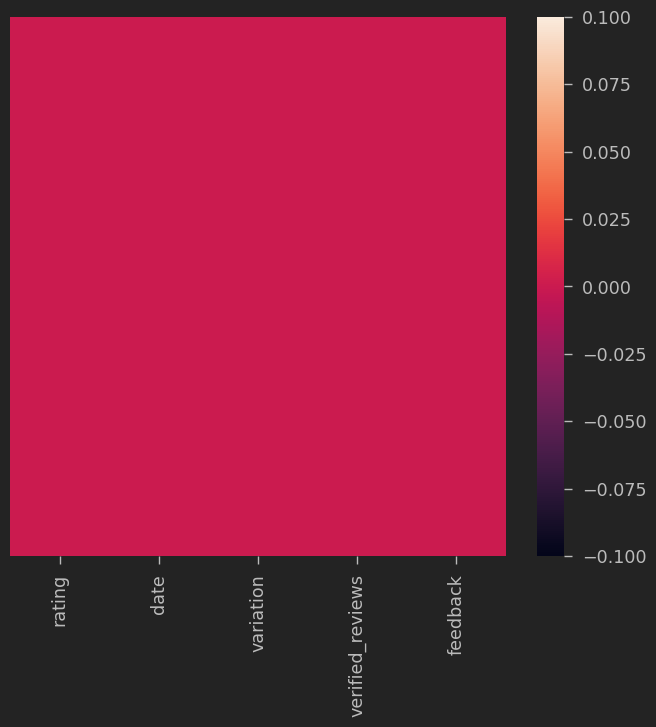

In [11]:
sns.heatmap(dff.isnull(), yticklabels = False)

<Axes: xlabel='rating', ylabel='count'>

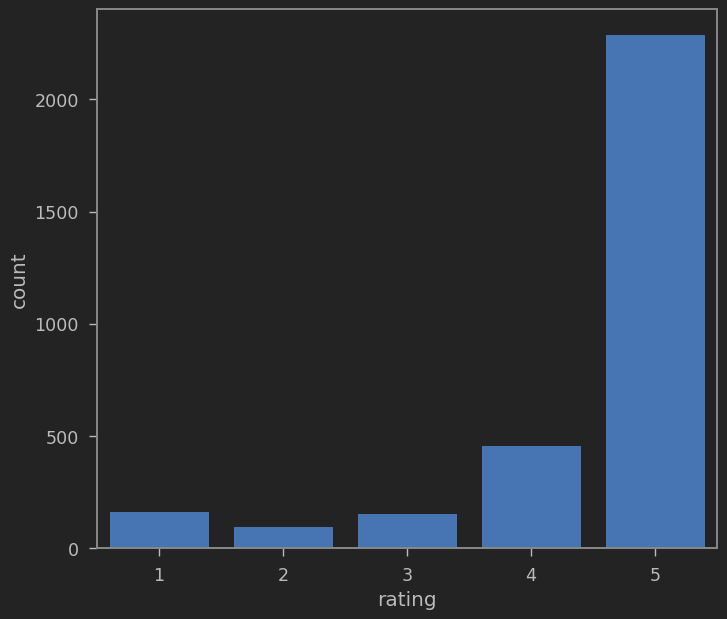

In [12]:
sns.countplot(x = dff["rating"])

<Axes: xlabel='feedback', ylabel='count'>

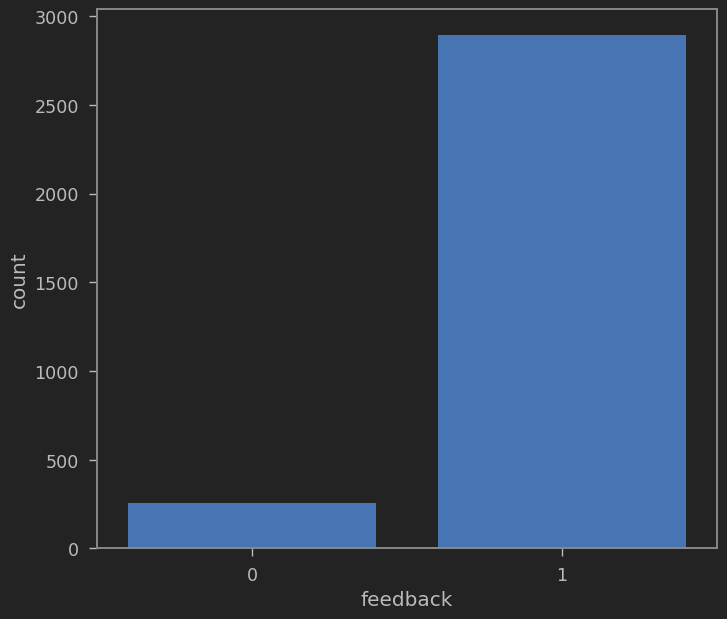

In [13]:
#plot the countplot for the feedback column

sns.countplot(x = dff["feedback"])


In [14]:
# roughly how many positive and negative feedbacks are present in the dataset

num_positive_feedback = dff[dff['feedback'] == 1].shape[0]
num_negative_feedback = dff[dff['feedback'] == 0].shape[0]

print(f"Number of positive feedbacks: {num_positive_feedback}")
print(f"Number of negative feedbacks: {num_negative_feedback}")


Number of positive feedbacks: 2893
Number of negative feedbacks: 257


# **Data Exploration**

### **to get the length  of characters in (cell) of any specified columns**

In [15]:
#len(dff["verified_reviews"])
dff["length"] = dff["verified_reviews"].apply(len)
dff

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


### **plot a histogram**

<Axes: ylabel='Frequency'>

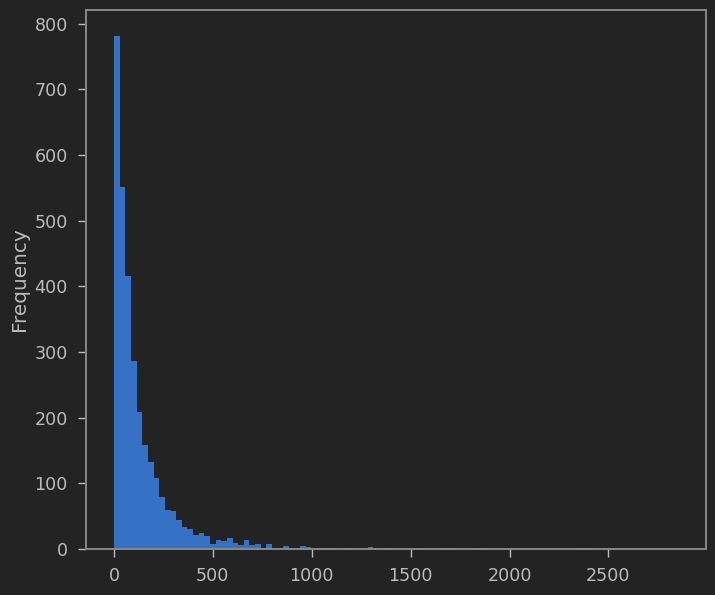

In [16]:
dff["length"].plot(bins = 100 , kind = "hist")

In [17]:
dff.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


### **get the longest message review**

In [18]:
dff[dff["length"] == 2851.000000]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [19]:
dff.verified_reviews[dff["length"] == 2851].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [20]:
# for the average length

dff.verified_reviews[dff["length"] == 132].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

## **Ploting the world Cloud**

* Obtain only positive reviews

---



In [21]:
positive_Df = dff[dff["feedback"] == 1]
positive_Df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


* Obtain only negative reviews

---



In [22]:
negative_Df = dff[dff["feedback"] == 0]
negative_Df

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


# **Add all the reviews to a list**

In [23]:
sentence = positive_Df["verified_reviews"].tolist()
len(sentence)

2893

## **Join all the reviews into a single Large string**

In [24]:
one_Sent_string = " ".join(sentence)
len(one_Sent_string)

363531

## **Ploting the +ve world Cloud**

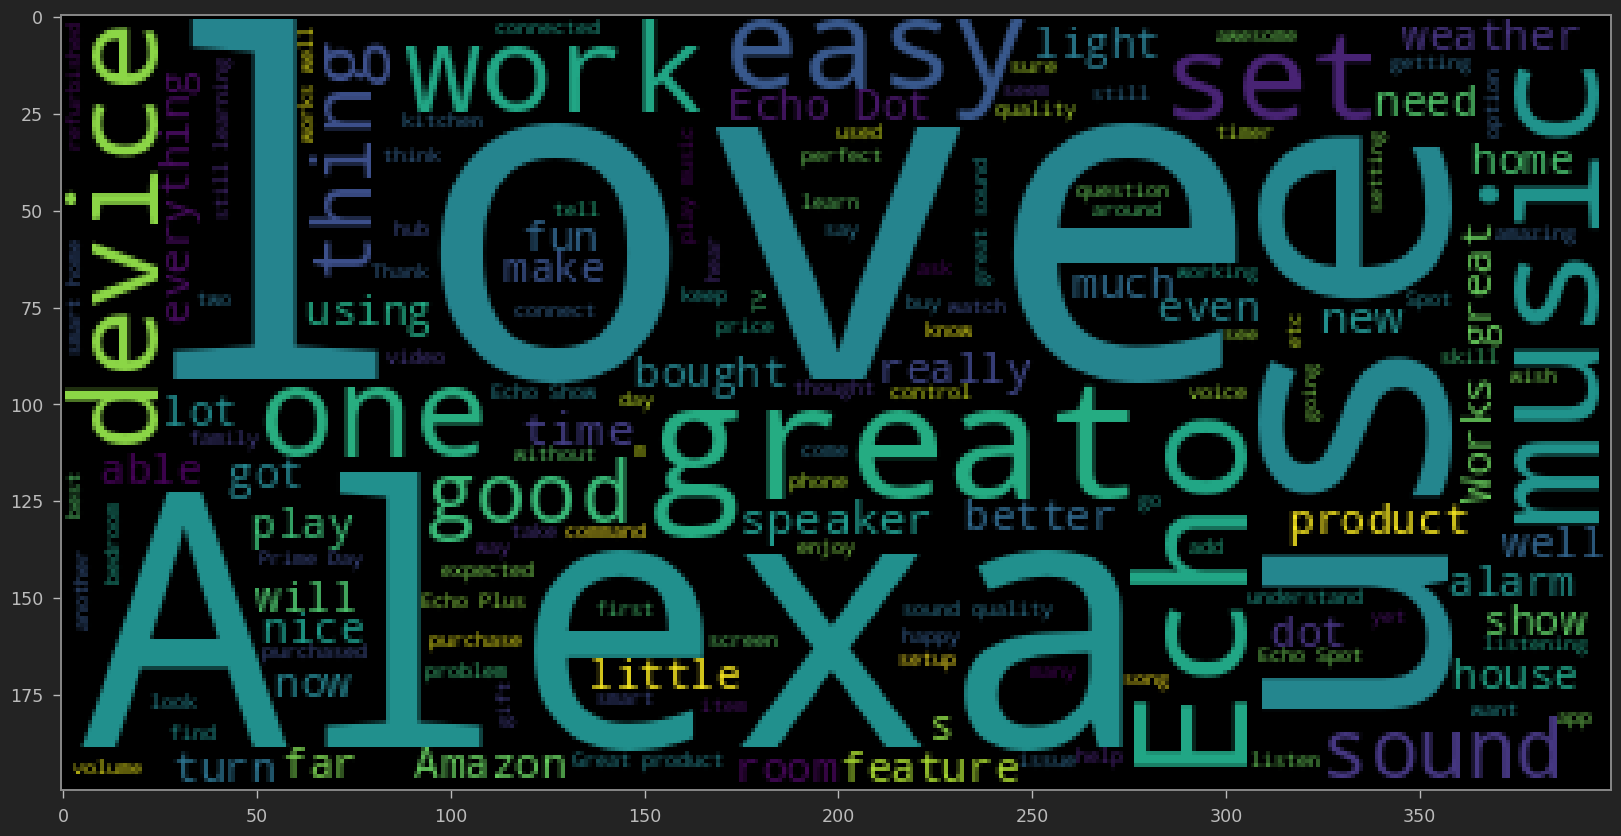

In [25]:
# print Positive wordcloud

from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(one_Sent_string))

## **Ploting the -ve world Cloud**

In [26]:
state = negative_Df["verified_reviews"].tolist()
len(state)

257

In [27]:
one_negative_state = " ".join(negative_Df["verified_reviews"])
len(one_negative_state)

55573

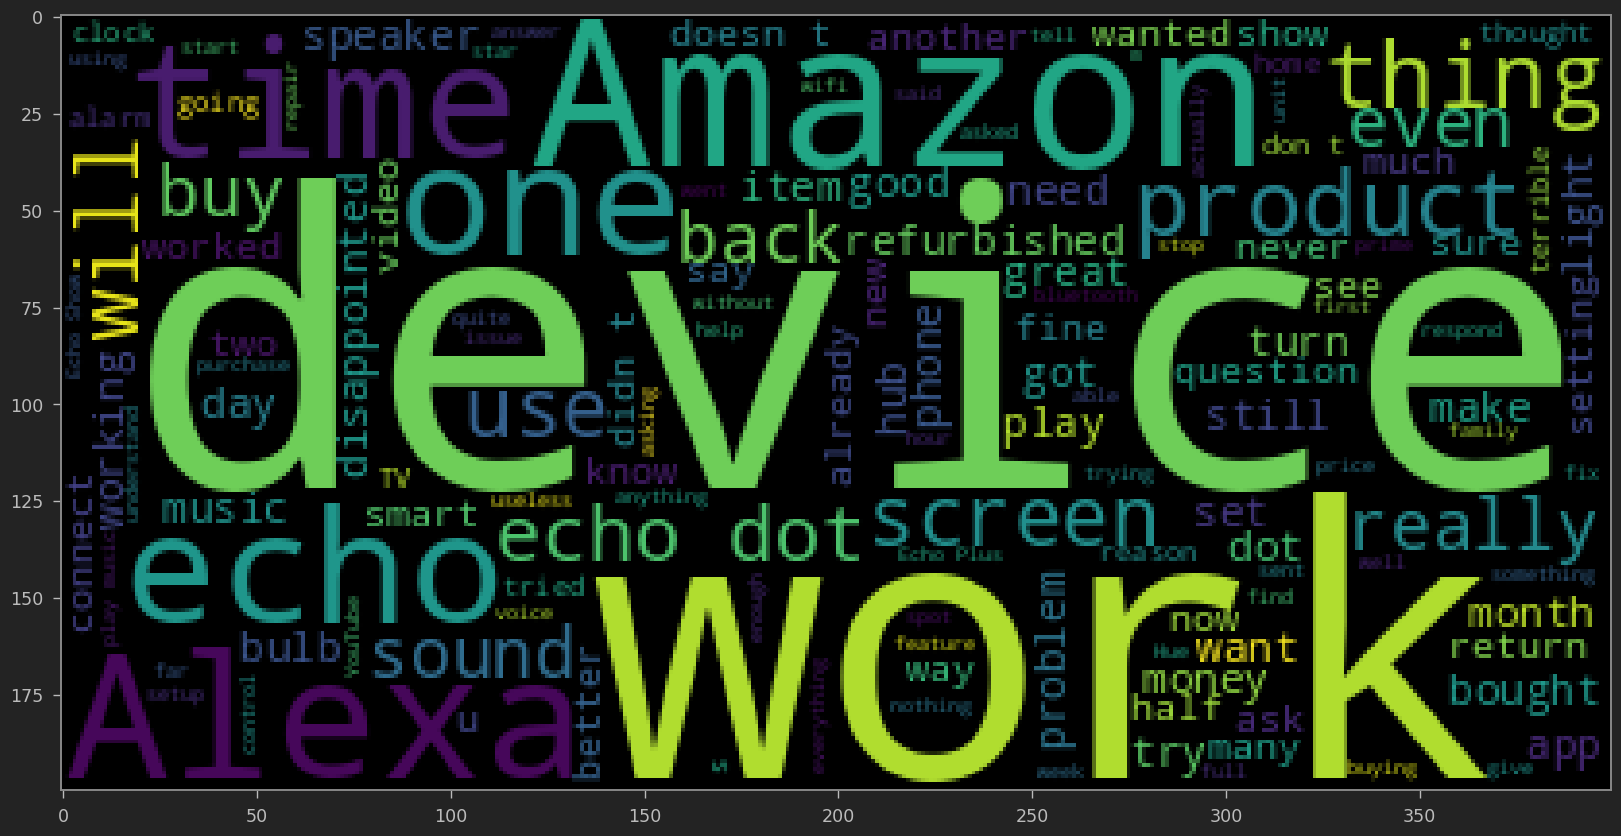

In [28]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(one_negative_state))

# **TEXT CLEANING**





---



# 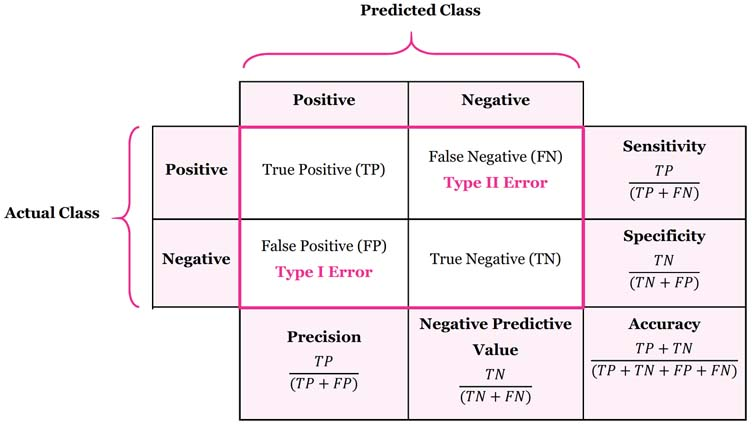
---



# **PRACTICE TASKS--------**

---

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
text = "The sky $turned a fiery red as% the sun #dipped below the horizon; the stars began to twinkle, signaling the arrival of night."

In [31]:
test_punc_removed = [char  for char in text if char not in string.punctuation]
test_punc_removed

['T',
 'h',
 'e',
 ' ',
 's',
 'k',
 'y',
 ' ',
 't',
 'u',
 'r',
 'n',
 'e',
 'd',
 ' ',
 'a',
 ' ',
 'f',
 'i',
 'e',
 'r',
 'y',
 ' ',
 'r',
 'e',
 'd',
 ' ',
 'a',
 's',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'u',
 'n',
 ' ',
 'd',
 'i',
 'p',
 'p',
 'e',
 'd',
 ' ',
 'b',
 'e',
 'l',
 'o',
 'w',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'h',
 'o',
 'r',
 'i',
 'z',
 'o',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 't',
 'a',
 'r',
 's',
 ' ',
 'b',
 'e',
 'g',
 'a',
 'n',
 ' ',
 't',
 'o',
 ' ',
 't',
 'w',
 'i',
 'n',
 'k',
 'l',
 'e',
 ' ',
 's',
 'i',
 'g',
 'n',
 'a',
 'l',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'a',
 'r',
 'r',
 'i',
 'v',
 'a',
 'l',
 ' ',
 'o',
 'f',
 ' ',
 'n',
 'i',
 'g',
 'h',
 't']

In [32]:
test_punc_removed_joined = "".join(test_punc_removed)
print("original text was : \n" ,text)
print("Now text is : \n" ,test_punc_removed_joined)


original text was : 
 The sky $turned a fiery red as% the sun #dipped below the horizon; the stars began to twinkle, signaling the arrival of night.
Now text is : 
 The sky turned a fiery red as the sun dipped below the horizon the stars began to twinkle signaling the arrival of night


# **NLTK  (Natural language tool kit)**

In [33]:
import nltk

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
a = stopwords.words('english')
a


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
tst_w_join = "So here comes the task of Sentiment analysis of the text content or the opinions of the people, generated during the social interactions, which are to be analysed in order to know the emotion of the text "

In [36]:
tst_w_clean = [i for i in tst_w_join.split()  if i.lower() not in stopwords.words('english')]

In [37]:
tst_w_clean

['comes',
 'task',
 'Sentiment',
 'analysis',
 'text',
 'content',
 'opinions',
 'people,',
 'generated',
 'social',
 'interactions,',
 'analysed',
 'order',
 'know',
 'emotion',
 'text']

# **Mini Challenge :**

---
**mini = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**



In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
mini = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'

In [40]:
text_clean = [ch for ch in mini  if ch not in string.punctuation]
text_clean

['H',
 'e',
 'r',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'm',
 'i',
 'n',
 'i',
 ' ',
 'c',
 'h',
 'a',
 'l',
 'l',
 'e',
 'n',
 'g',
 'e',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'w',
 'i',
 'l',
 'l',
 ' ',
 't',
 'e',
 'a',
 'c',
 'h',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 's',
 't',
 'o',
 'p',
 'w',
 'o',
 'r',
 'd',
 's',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ',
 't',
 'e',
 'x',
 't']

In [41]:
cleaned_text = "".join(text_clean)
cleaned_text

'Here is a mini challenge that will teach you how to remove stopwords and punctuations from text'



---



# **Text Tokenization count vectorization**

---
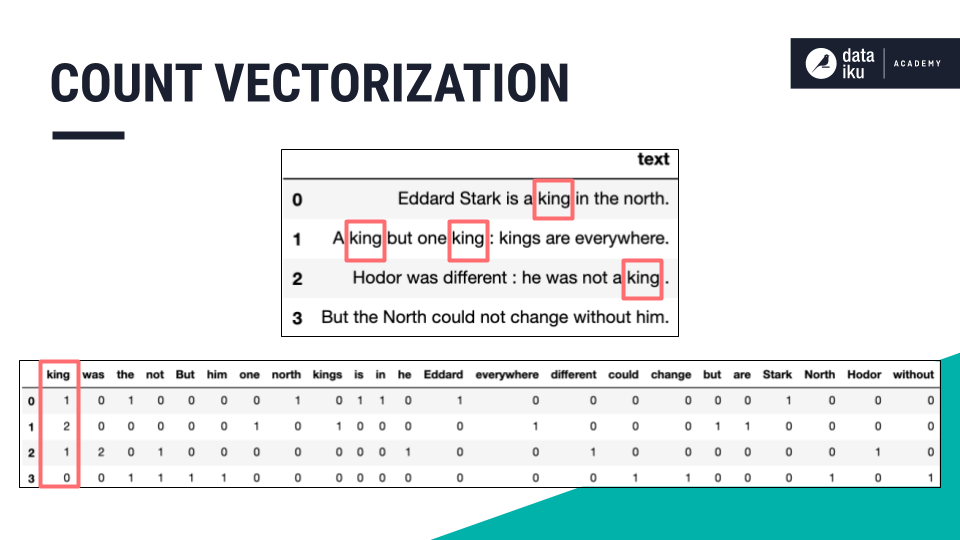


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the First paper.','This Document is the second paper','And this is the Third one']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

print(type(vectorizer))
print(vectorizer.get_feature_names_out())
print(X.toarray())

<class 'sklearn.feature_extraction.text.CountVectorizer'>
['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']
[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]]


## **Challenge for  count vectorization**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
sd = ['Hello World','Hello Hello World','Hello World world world']

vec = CountVectorizer()
s = vec.fit_transform(sd)

print(vec.get_feature_names_out())
print(s.toarray())

['hello' 'world']
[[1 1]
 [2 1]
 [1 3]]


# **PRACTICE TASK ENDS HERE______**


---
# **Actual Task Starts here-------**


# **Creating A pipeline to remove Punctuations, Stopwords and Perform Count Vectorization**

---



In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
a = stopwords.words('english')

tst_w_join = "So here comes the task of Sentiment analysis of the text content or the opinions of the people, generated during the social interactions, which are to be analysed in order to know the emotion of the text "
tst_w_clean = [i for i in tst_w_join.split()  if i.lower() not in stopwords.words('english')]
print(tst_w_clean)

['comes', 'task', 'Sentiment', 'analysis', 'text', 'content', 'opinions', 'people,', 'generated', 'social', 'interactions,', 'analysed', 'order', 'know', 'emotion', 'text']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# pipeline to clean up All the messages
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
a = stopwords.words('english')

# pipeline to clean up All the messages
def message_clean(data_sample):
  test_punc_removed = [char for char in data_sample if char not in string.punctuation]
  test_punc_join = "".join(test_punc_removed)
  test_punc_removed_join_clean = [word for word in test_punc_join.split() if word.lower() not in stopwords.words('english')]
  return test_punc_removed_join_clean


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
opinion_df_clean = dff['verified_reviews'].apply(message_clean)

In [48]:
print(dff['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [49]:
print(opinion_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


**Now performing tokenising count vectorization**





In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_clean)
cleaned_data = vectorizer.fit_transform(dff['verified_reviews'])


In [51]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [52]:
print(cleaned_data.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
cleaned_data.shape

(3150, 5211)

# **Independant Variable X**

In [54]:
reviews = pd.DataFrame(cleaned_data.toarray())
X = reviews
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X.shape

(3150, 5211)

# **Dependant Variable Y**

In [56]:
y = dff['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [57]:
y.shape[0]

3150

# **TRAIN & TEST NAIVE BASED CLASSIFIER MODEL**

In [58]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

## **Multinomial Naive Bayes** Model

In [59]:
#Model Fitting
from sklearn.naive_bayes import MultinomialNB
NB_classifier =  MultinomialNB()
NB_classifier.fit(X_train , y_train)

MultinomialNB()

## **Confusion Matrix**

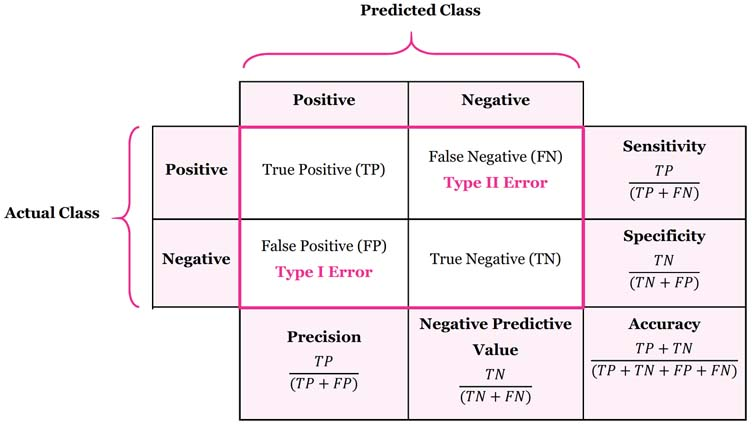

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

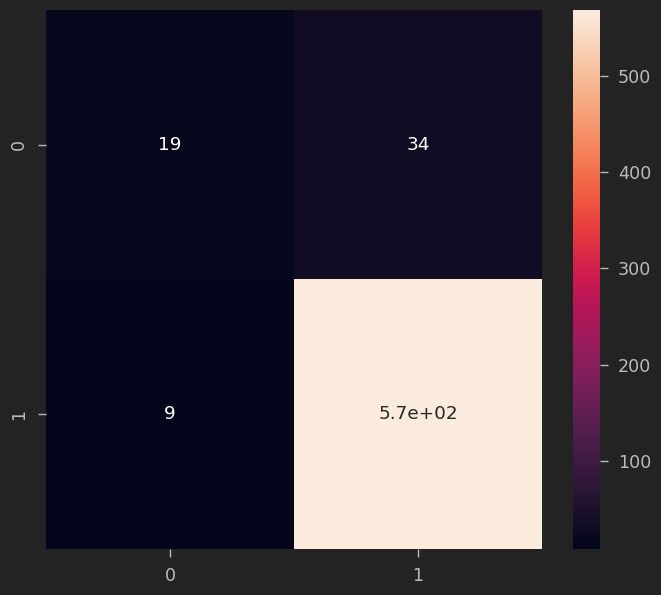

In [61]:
# predicting the test result
y_pred = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot = True)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.36      0.47        53
           1       0.94      0.98      0.96       577

    accuracy                           0.93       630
   macro avg       0.81      0.67      0.72       630
weighted avg       0.92      0.93      0.92       630



## **Now Applying Losgistic model on this**

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

<Axes: >

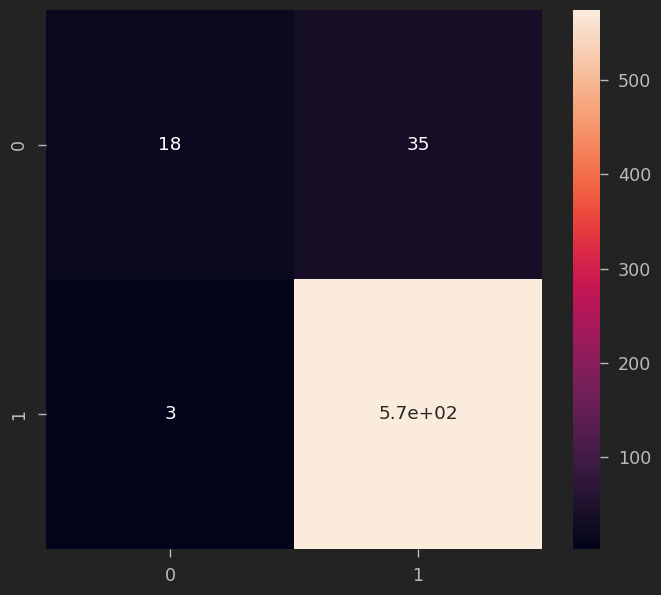

In [64]:
y_pred1 = model.predict(X_test)
cm = confusion_matrix(y_test , y_pred1)
sns.heatmap(cm, annot = True)

In [65]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.34      0.49        53
           1       0.94      0.99      0.97       577

    accuracy                           0.94       630
   macro avg       0.90      0.67      0.73       630
weighted avg       0.94      0.94      0.93       630



In [66]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.6 MB/s eta 0:00:00


In [67]:

from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(verbose = 500)
# training
cat_model.fit(X_train, y_train)

Learning rate set to 0.015287
0:	learn: 0.6777335	total: 110ms	remaining: 1m 49s
500:	learn: 0.1836476	total: 16.3s	remaining: 16.3s
999:	learn: 0.1375797	total: 46.4s	remaining: 0us


<Axes: >

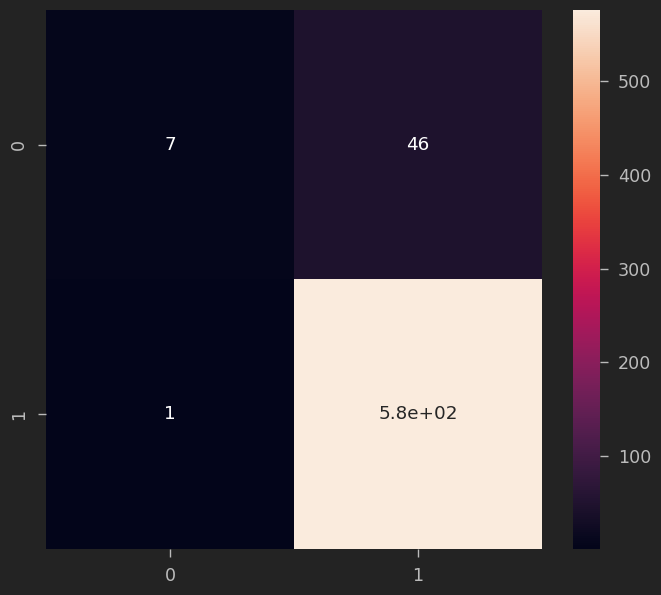

In [68]:
y_pred2 = cat_model.predict(X_test)
cm = confusion_matrix(y_test , y_pred2)
sns.heatmap(cm, annot = True)

In [69]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.13      0.23        53
           1       0.93      1.00      0.96       577

    accuracy                           0.93       630
   macro avg       0.90      0.57      0.60       630
weighted avg       0.92      0.93      0.90       630



In [70]:
# prompt: from above model calculate the accuracy score

from sklearn.metrics import accuracy_score

accuracy_score_nb = accuracy_score(y_test, y_pred)
accuracy_score_lr = accuracy_score(y_test, y_pred1)
accuracy_score_cb = accuracy_score(y_test, y_pred2)

print("Accuracy score for Naive Bayes model:", accuracy_score_nb)
print("Accuracy score for Logistic Regression model:", accuracy_score_lr)
print("Accuracy score for CatBoost model:", accuracy_score_cb)

Accuracy score for Naive Bayes model: 0.9317460317460318
Accuracy score for Logistic Regression model: 0.9396825396825397
Accuracy score for CatBoost model: 0.9253968253968254


---
# **Ensemble Models**

---



# **All three models together**
* # **Naive Bayes**
* # **Logistic Regression**
* # **Catboost model**

In [71]:
# prompt: make ensemble model by combining all three models together

from sklearn.ensemble import VotingClassifier

# Create a dictionary of base models
estimators = [('Naive Bayes', NB_classifier),
              ('Logistic Regression', model),
              ('CatBoost', cat_model)]

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble model
y_pred_ensemble = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy_score_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Print the accuracy of the ensemble model
print("Accuracy score for the ensemble model:", accuracy_score_ensemble)
print("Accuracy : ",accuracy_score_ensemble*100)

Learning rate set to 0.015287
0:	learn: 0.6777335	total: 76.3ms	remaining: 1m 16s
500:	learn: 0.1836476	total: 41.6s	remaining: 41.4s
999:	learn: 0.1375797	total: 1m 3s	remaining: 0us
Accuracy score for the ensemble model: 0.9333333333333333
Accuracy :  93.33333333333333


# **Naive Bayes & Logistic Model**

In [72]:
from sklearn.ensemble import VotingClassifier

# Create a dictionary of base models
estimators = [('Naive Bayes', NB_classifier),
              ('Logistic Regression', model)]

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble model
y_pred_ensemble = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy_score_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Print the accuracy of the ensemble model
print("Accuracy score for the ensemble model:", accuracy_score_ensemble)
print("Accuracy : ",accuracy_score_ensemble*100)

Accuracy score for the ensemble model: 0.9412698412698413
Accuracy :  94.12698412698413


# **Naive Bayes & Cat Model**

In [73]:
from sklearn.ensemble import VotingClassifier

# Create a dictionary of base models
estimators = [('Naive Bayes', NB_classifier),
              ('CatBoost', cat_model)]

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble model
y_pred_ensemble = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy_score_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Print the accuracy of the ensemble model
print("Accuracy score for the ensemble model:", accuracy_score_ensemble)
print("Accuracy : ",accuracy_score_ensemble*100)

Learning rate set to 0.015287
0:	learn: 0.6777335	total: 31.1ms	remaining: 31s
500:	learn: 0.1836476	total: 12.2s	remaining: 12.2s
999:	learn: 0.1375797	total: 22.7s	remaining: 0us
Accuracy score for the ensemble model: 0.9365079365079365
Accuracy :  93.65079365079364


# **Logistic & CatModel**

In [74]:
from sklearn.ensemble import VotingClassifier

# Create a dictionary of base models
estimators = [('Logistic Regression', model),
              ('CatBoost', cat_model)]

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble model
y_pred_ensemble = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy_score_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Print the accuracy of the ensemble model
print("Accuracy score for the ensemble model:", accuracy_score_ensemble)
print("Accuracy : ",accuracy_score_ensemble*100)

Learning rate set to 0.015287
0:	learn: 0.6777335	total: 18.5ms	remaining: 18.4s
500:	learn: 0.1836476	total: 10.6s	remaining: 10.5s
999:	learn: 0.1375797	total: 21s	remaining: 0us
Accuracy score for the ensemble model: 0.9412698412698413
Accuracy :  94.12698412698413


In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

<Axes: >

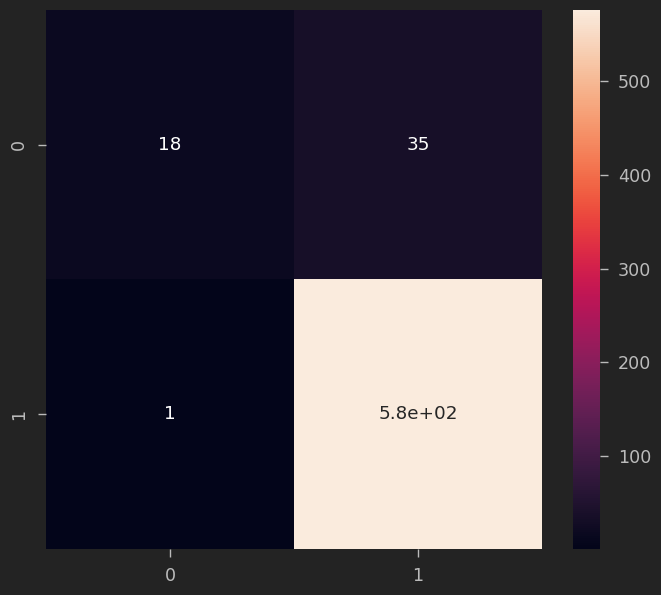

In [76]:
y_pred4 = model.predict(X_test)
cm = confusion_matrix(y_test , y_pred4)
sns.heatmap(cm, annot = True)

In [77]:
accuracy_score= accuracy_score(y_test, y_pred4)

# Print the accuracy of the ensemble model
print("Accuracy score for the ensemble model:", accuracy_score)
print("Accuracy : ",accuracy_score*100)

Accuracy score for the ensemble model: 0.9428571428571428
Accuracy :  94.28571428571428


# **Applying the LSTM Model**

In [78]:
opinion_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
# prompt: apply LSTM model to above dataset

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Define the model
model = Sequential()
model.add(Embedding(len(opinion_df_clean), 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
model.evaluate(X_test, y_test)


Epoch 1/10
22/79 [=======>......................] - ETA: 20:34 - loss: 0.4078 - accuracy: 0.8821